In [1]:
%pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install pandas_ta

In [3]:
import pandas_ta as ta
import numpy as np
import talib
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
data = yf.download('AAPL', start='2015-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
df = data.copy()

In [6]:
df['sma_short'] = df.Close.rolling(24).mean()
df['sma_long'] = df.Close.rolling(52).mean()

In [7]:
sma_short = mpf.make_addplot(df['sma_short'], color='orange')
sma_long = mpf.make_addplot(df['sma_long'], color='y')

In [8]:
sma_list = [sma_short, sma_long]

C:\Users\Rujisaran\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


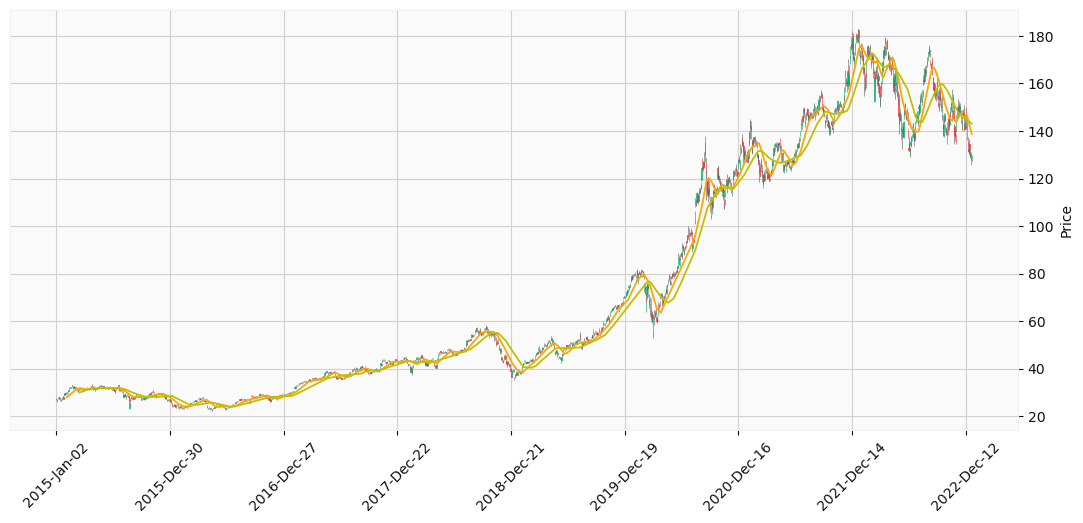

In [9]:
mpf.plot(df,style='yahoo', type='candle', addplot = sma_list, figsize=(14,6))

In [10]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long
Date,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565701,212818400,NaN,NaN
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873646,257142000,NaN,NaN
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875891,263188400,NaN,NaN
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210682,160423600,NaN,NaN
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140911,237458000,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,142.107917,143.998461
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,141.358750,143.838654
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,140.352917,143.512692


In [11]:
df['trend'] = df['sma_short'] > df['sma_long']

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend
Date,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565701,212818400,NaN,NaN,False
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873646,257142000,NaN,NaN,False
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875891,263188400,NaN,NaN,False
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210682,160423600,NaN,NaN,False
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140911,237458000,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,142.107917,143.998461,False
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,141.358750,143.838654,False
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,140.352917,143.512692,False


In [13]:
df['trend_shift'] = df.trend.shift(1)

In [14]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift
Date,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565701,212818400,NaN,NaN,False,NaN
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873646,257142000,NaN,NaN,False,False
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875891,263188400,NaN,NaN,False,False
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210682,160423600,NaN,NaN,False,False
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140911,237458000,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,142.107917,143.998461,False,False
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,141.358750,143.838654,False,False
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,140.352917,143.512692,False,False


In [15]:
df.loc[(df.trend == True) & (df.trend_shift == False),'action'] = 'buy'
df.loc[(df.trend == False) & (df.trend_shift == True),'action'] = 'sell'

In [16]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action
Date,,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565701,212818400,NaN,NaN,False,NaN,NaN
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873646,257142000,NaN,NaN,False,False,NaN
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875891,263188400,NaN,NaN,False,False,NaN
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210682,160423600,NaN,NaN,False,False,NaN
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140911,237458000,NaN,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,142.107917,143.998461,False,False,NaN
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,141.358750,143.838654,False,False,NaN
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,140.352917,143.512692,False,False,NaN


In [17]:
df[df.action == 'buy']

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action
Date,,,,,,,,,,,
2015-03-18,31.750000,32.290001,31.592501,32.117500,28.980247,261083600,31.909062,29.992452,True,False,buy
2015-05-01,31.525000,32.532501,31.325001,32.237499,29.088526,234050400,31.800729,31.792981,True,False,buy
2015-10-28,29.232500,29.825001,29.014999,29.817499,27.139589,342205600,28.129167,28.102115,True,False,buy
2016-03-15,25.990000,26.295000,25.962500,26.145000,24.028460,160270800,24.660313,24.605769,True,False,buy
2016-07-05,23.847500,23.850000,23.615000,23.747499,21.957928,110820800,24.130937,24.127452,True,False,buy
2016-07-28,25.707500,26.112499,25.705000,26.084999,24.119278,159479200,24.332812,24.319856,True,False,buy
2016-12-23,28.897499,29.129999,28.897499,29.129999,27.219755,56998000,28.276875,28.262981,True,False,buy
2017-08-04,39.017502,39.349998,38.922501,39.097500,36.843468,82239600,37.345208,37.300384,True,False,buy
2017-11-03,43.500000,43.564999,42.779999,43.125000,40.798374,237594400,39.850729,39.723510,True,False,buy


In [18]:
df.loc[df['action'] == 'buy', 'marker_position'] = df['Low'] *0.95
df.loc[df['action'] == 'sell', 'marker_position'] = df['High'] *1.05

In [19]:
df[df.marker_position.notnull()]

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,,
2015-03-18,31.750000,32.290001,31.592501,32.117500,28.980247,261083600,31.909062,29.992452,True,False,buy,30.012876
2015-04-17,31.387501,31.535000,31.115000,31.187500,28.141094,207828000,31.484062,31.485481,False,True,sell,33.111750
2015-05-01,31.525000,32.532501,31.325001,32.237499,29.088526,234050400,31.800729,31.792981,True,False,buy,29.758751
2015-06-30,31.392500,31.530001,31.215000,31.357500,28.412668,177482800,32.018854,32.076009,False,True,sell,33.106501
2015-10-28,29.232500,29.825001,29.014999,29.817499,27.139589,342205600,28.129167,28.102115,True,False,buy,27.564249
2015-12-18,27.227501,27.379999,26.452499,26.507500,24.230135,385813200,28.881875,28.912356,False,True,sell,28.748999
2016-03-15,25.990000,26.295000,25.962500,26.145000,24.028460,160270800,24.660313,24.605769,True,False,buy,24.664375
2016-05-09,23.250000,23.442499,23.147499,23.197500,21.449377,131745600,25.753750,25.901539,False,True,sell,24.614624
2016-07-05,23.847500,23.850000,23.615000,23.747499,21.957928,110820800,24.130937,24.127452,True,False,buy,22.434250


In [20]:
b = df.loc[df.action == 'buy']

s = df.loc[df.action == 'sell']

In [21]:
b

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,,
2015-03-18,31.750000,32.290001,31.592501,32.117500,28.980247,261083600,31.909062,29.992452,True,False,buy,30.012876
2015-05-01,31.525000,32.532501,31.325001,32.237499,29.088526,234050400,31.800729,31.792981,True,False,buy,29.758751
2015-10-28,29.232500,29.825001,29.014999,29.817499,27.139589,342205600,28.129167,28.102115,True,False,buy,27.564249
2016-03-15,25.990000,26.295000,25.962500,26.145000,24.028460,160270800,24.660313,24.605769,True,False,buy,24.664375
2016-07-05,23.847500,23.850000,23.615000,23.747499,21.957928,110820800,24.130937,24.127452,True,False,buy,22.434250
2016-07-28,25.707500,26.112499,25.705000,26.084999,24.119278,159479200,24.332812,24.319856,True,False,buy,24.419750
2016-12-23,28.897499,29.129999,28.897499,29.129999,27.219755,56998000,28.276875,28.262981,True,False,buy,27.452624
2017-08-04,39.017502,39.349998,38.922501,39.097500,36.843468,82239600,37.345208,37.300384,True,False,buy,36.976376
2017-11-03,43.500000,43.564999,42.779999,43.125000,40.798374,237594400,39.850729,39.723510,True,False,buy,40.640999


In [22]:
s

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,,
2015-04-17,31.387501,31.535000,31.115000,31.187500,28.141094,207828000,31.484062,31.485481,False,True,sell,33.111750
2015-06-30,31.392500,31.530001,31.215000,31.357500,28.412668,177482800,32.018854,32.076009,False,True,sell,33.106501
2015-12-18,27.227501,27.379999,26.452499,26.507500,24.230135,385813200,28.881875,28.912356,False,True,sell,28.748999
2016-05-09,23.250000,23.442499,23.147499,23.197500,21.449377,131745600,25.753750,25.901539,False,True,sell,24.614624
2016-07-15,24.730000,24.825001,24.625000,24.695000,22.834030,120548000,24.003958,24.011490,False,True,sell,26.066251
2016-11-17,27.452499,27.587500,27.207500,27.487499,25.684971,110528000,28.146979,28.167163,False,True,sell,28.966875
2017-06-29,36.177502,36.282501,35.570000,35.919998,33.849155,125997600,37.169895,37.226730,False,True,sell,38.096626
2017-10-05,38.544998,38.860001,38.512501,38.847500,36.751648,85135200,39.263854,39.335625,False,True,sell,40.803001
2018-02-06,38.707500,40.930000,38.500000,40.757500,38.697201,272975200,43.017187,43.035096,False,True,sell,42.976500


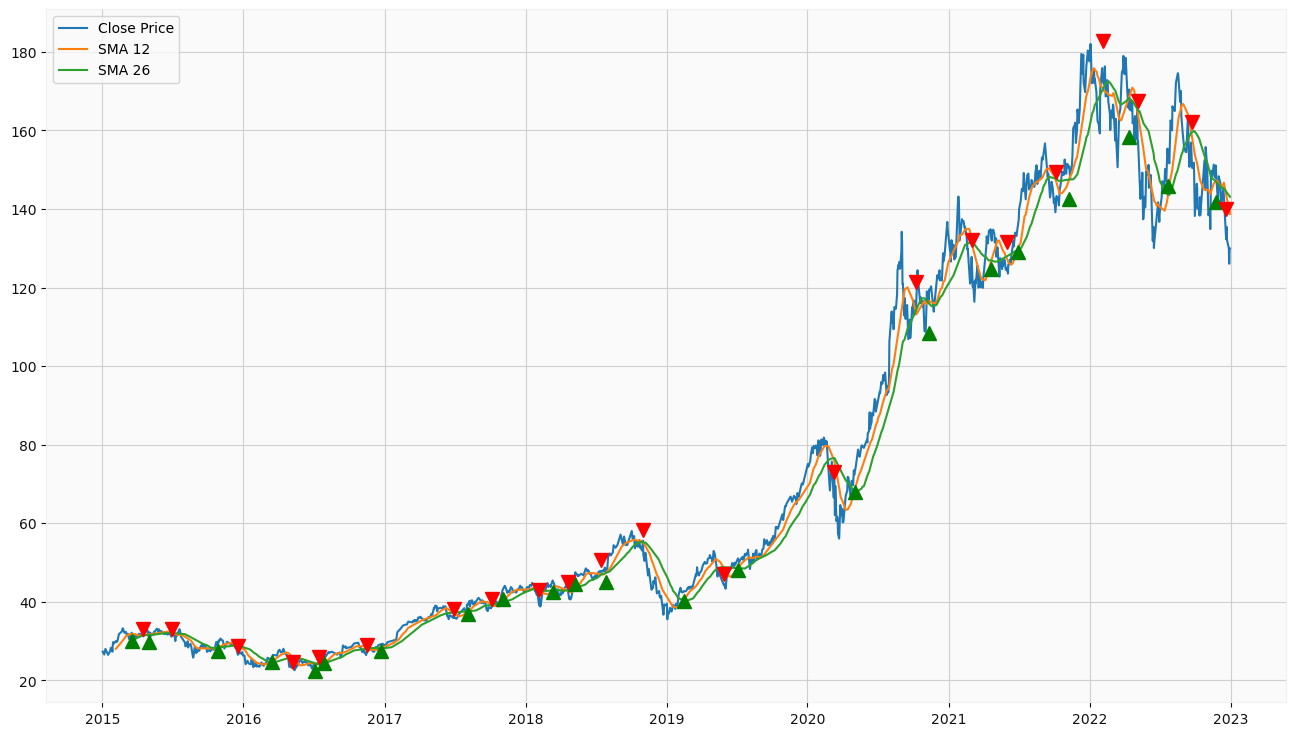

In [23]:
plt.figure(figsize=(16,9))
plt.plot(df.Close, label='Close Price')
plt.plot(df.sma_short, label='SMA 12')
plt.plot(df.sma_long, label='SMA 26')
plt.plot(b.marker_position, 'g^', markersize=10)
plt.plot(s.marker_position, 'rv', markersize=10)
plt.legend()

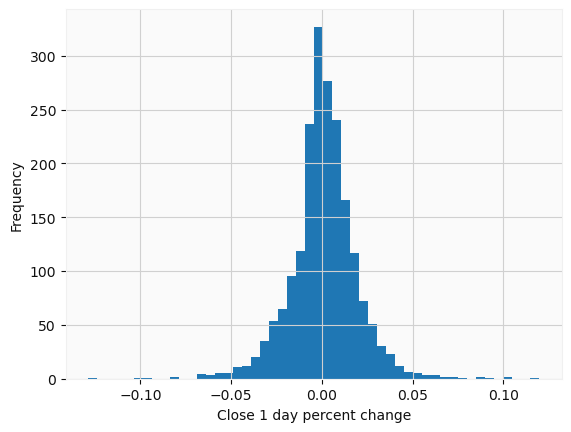

In [24]:
df['Close'].pct_change().plot.hist(bins=50)
plt.xlabel("Close 1 day percent change")
plt.show()

## FEATURES

In [25]:
df.drop(["trend","trend_shift","action","marker_position"],axis = 'columns',inplace = True)

In [26]:
feature_names = []
for n in [7,14, 30 , 50 , 150 , 200]:
    df['ma' + str(n)] = talib.SMA(df['Close'].values, timeperiod=n)
    df['rsi' + str(n)] = talib.RSI(df['Close'].values, timeperiod=n)

    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

In [27]:
df['Volume_1d_change'] = df['Volume'].pct_change()

volume_features = ['Volume_1d_change']
feature_names.extend(volume_features)

In [28]:
df['5d_future_close'] = df['Close'].shift(-5)
df['5d_close_future_pct'] = df['5d_future_close'].pct_change(5)

In [29]:
df.dropna(inplace = True)

In [30]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,ma7,rsi7,...,rsi30,ma50,rsi50,ma150,rsi150,ma200,rsi200,Volume_1d_change,5d_future_close,5d_close_future_pct
Date,,,,,,,,,,,,,,,,,,,,,
2015-10-19,27.700001,27.937500,27.527500,27.932501,25.423880,119036800,28.030208,28.097308,27.869643,52.543983,...,47.041090,28.06795,46.985765,30.446067,50.349455,30.335337,50.401930,-0.241468,28.820000,0.031773
2015-10-20,27.834999,28.542500,27.705000,28.442499,25.888075,195871200,28.002708,28.090769,27.928571,63.863455,...,49.438621,28.03820,48.397802,30.421567,50.801497,30.344737,50.740202,0.645468,28.637501,0.006856
2015-10-21,28.500000,28.895000,28.424999,28.440001,25.885798,167180800,28.001042,28.082308,28.005714,63.776504,...,49.427280,28.03955,48.391358,30.398667,50.799216,30.354112,50.738498,-0.146476,29.817499,0.048435
2015-10-22,28.582500,28.875000,28.525000,28.875000,26.281736,166616400,28.022396,28.062019,28.138214,71.623672,...,51.433723,28.04085,49.583791,30.381333,51.183394,30.363800,51.026254,-0.003376,30.132500,0.043550
2015-10-23,29.174999,29.807501,29.082500,29.770000,27.096359,237467600,28.062708,28.088894,28.455000,81.331372,...,55.215501,28.06050,51.916270,30.367783,51.960356,30.372787,51.610744,0.425235,29.875000,0.003527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,136.690002,137.649994,133.729996,134.509995,134.304932,160156900,145.645833,144.904422,141.284286,25.127698,...,42.392317,144.86400,44.715314,149.206467,47.981314,152.818950,48.773910,0.618860,131.860001,-0.019701
2022-12-19,135.110001,135.199997,131.320007,132.369995,132.168198,79592600,144.982916,144.634615,139.815715,22.073757,...,41.261171,144.70960,44.001313,149.118667,47.706737,152.664950,48.554750,-0.503034,130.029999,-0.017678
2022-12-20,131.389999,133.250000,129.889999,132.300003,132.098312,77432800,144.243750,144.382115,138.407144,21.971861,...,41.223954,144.54720,43.977877,149.005733,47.697750,152.529950,48.547579,-0.027136,126.040001,-0.047317


In [31]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,ma7,rsi7,...,rsi30,ma50,rsi50,ma150,rsi150,ma200,rsi200,Volume_1d_change,5d_future_close,5d_close_future_pct
Open,1.000000,0.999827,0.999782,0.999537,0.999518,-0.307147,0.995802,0.990521,0.999109,-0.057350,...,-0.043048,0.990838,-0.019448,0.979492,0.120614,0.973217,0.206219,-0.028230,0.996475,-0.053909
High,0.999827,1.000000,0.999751,0.999783,0.999774,-0.302530,0.996024,0.990919,0.999149,-0.056171,...,-0.044152,0.991227,-0.020746,0.979910,0.119395,0.973621,0.205093,-0.025804,0.996714,-0.054337
Low,0.999782,0.999751,1.000000,0.999789,0.999760,-0.313280,0.995365,0.990090,0.998911,-0.050344,...,-0.038662,0.990402,-0.015953,0.979356,0.122772,0.973103,0.208127,-0.031245,0.996794,-0.053308
Close,0.999537,0.999783,0.999789,1.000000,0.999976,-0.308177,0.995499,0.990377,0.998846,-0.048894,...,-0.039433,0.990683,-0.016828,0.979568,0.122090,0.973283,0.207534,-0.029115,0.996942,-0.054277
Adj Close,0.999518,0.999774,0.999760,0.999976,1.000000,-0.308341,0.995674,0.990750,0.998882,-0.050235,...,-0.042123,0.991043,-0.020014,0.980389,0.117755,0.974300,0.203143,-0.029198,0.996938,-0.053656
Volume,-0.307147,-0.302530,-0.313280,-0.308177,-0.308341,1.000000,-0.295746,-0.294700,-0.304061,-0.212927,...,-0.213901,-0.294436,-0.194797,-0.313140,-0.150456,-0.317619,-0.151526,0.417656,-0.308250,-0.016218
sma_short,0.995802,0.996024,0.995365,0.995499,0.995674,-0.295746,1.000000,0.997095,0.997650,-0.117802,...,-0.098610,0.997382,-0.067594,0.986031,0.083070,0.980393,0.170490,-0.028418,0.992371,-0.056635
sma_long,0.990521,0.990919,0.990090,0.990377,0.990750,-0.294700,0.997095,1.000000,0.992594,-0.131229,...,-0.139282,0.999985,-0.109862,0.991969,0.043036,0.986911,0.131440,-0.030026,0.987621,-0.053283
ma7,0.999109,0.999149,0.998911,0.998846,0.998882,-0.304061,0.997650,0.992594,1.000000,-0.080106,...,-0.058068,0.992913,-0.031903,0.981546,0.111184,0.975468,0.197249,-0.027905,0.995851,-0.053860
rsi7,-0.057350,-0.056171,-0.050344,-0.048894,-0.050235,-0.212927,-0.117802,-0.131229,-0.080106,1.000000,...,0.767258,-0.131124,0.641488,-0.126408,0.424157,-0.129935,0.376068,-0.041622,-0.046334,0.057634


## Make the prediction here

In [32]:
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [33]:
df.dropna(subset=["sma_short","sma_long"],inplace=True)
df.isnull().sum()

Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
sma_short              0
sma_long               0
ma7                    0
rsi7                   0
ma14                   0
rsi14                  0
ma30                   0
rsi30                  0
ma50                   0
rsi50                  0
ma150                  0
rsi150                 0
ma200                  0
rsi200                 0
Volume_1d_change       0
5d_future_close        0
5d_close_future_pct    0
dtype: int64

In [34]:
X = df[["Open","High","Low","sma_short","sma_long","ma7","rsi7","ma14","rsi14","ma30","rsi30","ma50","rsi50","ma150","rsi150","ma200","rsi200","Volume_1d_change","5d_future_close","5d_close_future_pct"]]
y = df["Close"]
df.isnull().sum()

Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
sma_short              0
sma_long               0
ma7                    0
rsi7                   0
ma14                   0
rsi14                  0
ma30                   0
rsi30                  0
ma50                   0
rsi50                  0
ma150                  0
rsi150                 0
ma200                  0
rsi200                 0
Volume_1d_change       0
5d_future_close        0
5d_close_future_pct    0
dtype: int64

In [35]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2 , shuffle=False,random_state = 42)

In [36]:
model = RandomForestRegressor(n_estimators=200, random_state=0, max_depth=10, max_features=5)
model.fit(train_x,train_y)

RandomForestRegressor(max_depth=10, max_features=5, n_estimators=200,
                      random_state=0)

In [37]:
pred_y = model.predict(test_x)

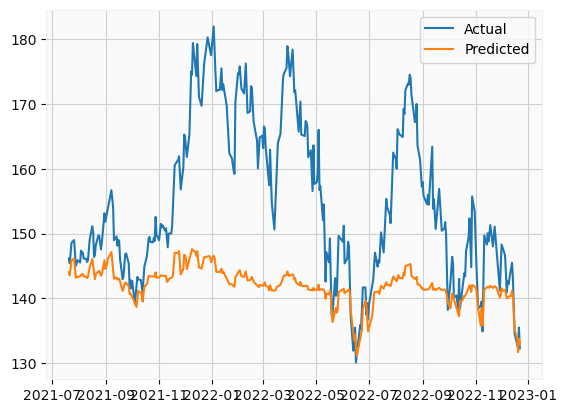

In [38]:
# Plot the predicted vs. actual stock prices
plt.plot(test_y.index, test_y.values, label='Actual')
plt.plot(test_y.index, pred_y, label='Predicted')
plt.legend()
plt.show()

In [39]:
# Calculate the Mean Squared Error (MSE) and R-squared
mse = metrics.mean_squared_error(test_y, pred_y)
r2 = metrics.r2_score(test_y, pred_y)

print(mse)
print(r2)

270.7275951370089
-0.8329544795725228
